In [1]:
from music21 import *

In [2]:
from IPython.display import display, Image, Audio, HTML

In [3]:
greekModes = [ 'ionian', 'dorian', 'phrygian',
'lydian', 'mixolydian', 'aeolian', 'locrian' ]

In [4]:
def circleOfFifths():
    fifths = []

    fifthsScale = scale.CyclicalScale('c4', 'p5')
    
    for p in fifthsScale.getPitches('c4', 'c11'):
        
        MAJOR = str(p.simplifyEnharmonic().name)
        MAJOR_EN = str(p.getEnharmonic().simplifyEnharmonic().name)
        MINOR = str(key.Key(MAJOR, 'major').relative.tonic.simplifyEnharmonic().name).lower()
        MINOR_EN = str(key.Key(MAJOR_EN, 'major').relative.tonic.simplifyEnharmonic().name).lower()

        if MAJOR == MAJOR_EN:
            major = MAJOR
        else:
            major = "{0} or {1}".format(MAJOR, MAJOR_EN)
            
        if MINOR == MINOR_EN:
            minor = MINOR
        else:
            minor = "{0} or {1}".format(MINOR, MINOR_EN)
        fifths.append( [ major, minor ] )

        #fifths.append(p.simplifyEnharmonic())
        
    return fifths

In [5]:
def returnScale(tonic='c', mode='major', ownKey = False):
    
    modes = [ 'ionian','dorian','phrygian',
              'lydian','mixolydian','aeolian',
              'locrian','major','minor']
    
    if mode in modes:
        if mode == 'ionian':
            mode = 'major'
        elif mode == 'aeolian':
            mode = 'minor'
    else:
        mymode = 'major'
        
    myfunc = eval("scale.{0}Scale".format(mode.capitalize()))
    pitches = myfunc(tonic).getPitches()

    scaleSharps = key.pitchToSharps(tonic, mode)
    myKeySig = key.KeySignature(scaleSharps)
    
    mystream = stream.Stream()
    
    if ownKey:
        mystream.append(myKeySig)

    for x in range(0, len(pitches)):
        mynote = note.Note(pitches[x])

        mynote.addLyric(interval.notesToInterval(pitches[0], mynote).directedName)
        mynote.addLyric(interval.notesToInterval(pitches[(x-1 if x>0 else 0)], mynote).directedName)
        
        mystream.append(mynote)
        
    return mystream

In [6]:
def returnTriads(tonic='c', mode='major', ownKey = False):
    
    modes = [ 'ionian','dorian','phrygian',
              'lydian','mixolydian','aeolian',
              'locrian','major','minor']
    
    if mode in modes:
        if mode == 'ionian':
            mode = 'major'
        elif mode == 'aeolian':
            mode = 'minor'
    else:
        mymode = 'major'
        
    myfunc = eval("scale.{0}Scale".format(mode.capitalize()))
    #pitches = myfunc(tonic).getPitches()

    pitches = myfunc(tonic).getChord(tonic+"4",tonic+"6").pitches
    scaleSharps = key.pitchToSharps(tonic, mode)
    myKeySig = key.KeySignature(scaleSharps)
    
    mystream = stream.Stream()
    
    myduration = duration.Duration("whole")
    
    if ownKey:
        mystream.append(myKeySig)
        
    for x in range(0,8):
        mychord = chord.Chord([ pitches[x], pitches[x+2], pitches[x+4] ], duration=myduration)
        mychord.addLyric(roman.romanNumeralFromChord(mychord,key.Key(tonic,mode)).figure)
        mychord.addLyric(harmony.chordSymbolFigureFromChord(mychord))
        
        mystream.append(mychord)
        
    return mystream

In [7]:
def midiStream(mystream):

    try:
        if myAudio:
            pass
    except:
        from IPython.display import Audio as myAudio
    
    mymidi_filename = mystream.write('midi')
    
    return myAudio(filename=mymidi_filename)

In [8]:
circleOfFifths()

[['C', 'a'],
 ['G', 'e'],
 ['D', 'b'],
 ['A', 'f#'],
 ['E', 'c#'],
 ['B', 'g#'],
 ['F# or G-', 'd# or e-'],
 ['C# or D-', 'a# or b-'],
 ['G# or A-', 'f'],
 ['D# or E-', 'c'],
 ['A# or B-', 'g'],
 ['F', 'd'],
 ['C', 'a']]

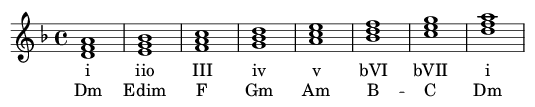

In [9]:
triads = returnTriads('D','aeolian',True).write()
Image(filename=triads)

In [39]:
def returnScale2(tonic='c', mode='major', ownKey = False):
    
    modes = [ 'ionian','dorian','phrygian',
              'lydian','mixolydian','aeolian',
              'locrian','major','minor']
    
    if not mode in modes:
        mode = 'major'
        
    if mode == 'ionian': mode = 'major'
    if mode == 'aeolian': mode = 'minor'

        
    tonic_pitch = pitch.Pitch(tonic)
    key_enharmonic = tonic_pitch.getEnharmonic().simplifyEnharmonic().name
    scaleSharps = key.pitchToSharps(key_enharmonic, mode)

    #    myfunc = eval("scale.{0}Scale".format(mode.capitalize()))
    scale_func = getattr(scale, "{0}Scale".format(mode.capitalize()))
    pitches = scale_func(key_enharmonic).getPitches()

        
    myKeySig = key.KeySignature(scaleSharps)
    
    mystream = stream.Stream()
    
    if ownKey:
        mystream.append(myKeySig)

    for x in range(0, len(pitches)):
        mynote = note.Note(pitches[x])

        mynote.addLyric(interval.notesToInterval(pitches[0], mynote).directedName)
        mynote.addLyric(interval.notesToInterval(pitches[(x-1 if x>0 else 0)], mynote).directedName)
        
        mystream.append(mynote)
        
    return mystream

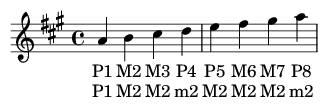

In [11]:
filenm = returnScale2('A',mode='major',ownKey=True).write()

Image(filename=filenm)

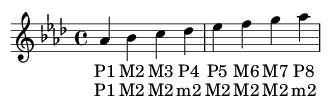

In [40]:
filenm = returnScale2('g#',mode='major',ownKey=True).write()

Image(filename=filenm)

In [27]:
freak=key.Key('g#','major')

In [30]:
dir(freak)

['_DOC_ATTR',
 '_DOC_ORDER',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abstract',
 '_activeSite',
 '_activeSiteStoredOffset',
 '_adjacencySearch',
 '_alteredPitches',
 '_alteredPitchesCached',
 '_attributesChanged',
 '_classListCacheDict',
 '_classListFullyQualifiedCacheDict',
 '_classSetCacheDict',
 '_deepcopySubclassable',
 '_derivation',
 '_duration',
 '_getActiveSite',
 '_getAlteredPitches',
 '_getDerivation',
 '_getDuration',
 '_getMeasureOffset',
 '_getMeasureOffsetOrMeterModulusOffset',
 '_getOffset',
 '_getPriority',
 '_getQuarterLength',
 '_getSeconds',
 '_getSharps',
 '_getTimeSignatureForBeat',
 '_humdrumSolfegSyllables',

In [34]:
freak.getPitches()[0].simplifyEnharmonic()

<music21.pitch.Pitch G#4>